 Approach & get sample surface example
==============================================================

In [1]:
%matplotlib notebook
import sys
sys.path.append(r'E:\Dropbox (Moler group)\TeamBF4K\software\scanning-squid\scanning-squid')
import utils
import numpy as np
from microscope.susceptometer import SusceptometerMicroscope
import logging
import time

In [2]:
config_file = 'config_susceptometer.json'

In [3]:
m = SusceptometerMicroscope(config_file, 'LT', log_name='example')

INFO:2018-08-12_07:19:36:microscope:Logging started.
INFO:2018-08-12_07:19:36:microscope:Initializing microscope object using file config_susceptometer.json.
INFO:2018-08-12_07:19:36:atto:Initializing ANC300 controller.
INFO:2018-08-12_07:19:37:microscope:Attocube controller successfully added to microscope.
INFO:2018-08-12_07:19:37:microscope:Lakeshore 372 successfully added to microscope.
INFO:2018-08-12_07:19:38:microscope:Lakeshore 331 successfully added to microscope.


Connected to: attocube ANC300 controller version 1.1.0-1304 2013-10-17 08:16.
Connected to: LSCI 372 (serial:LSA17DZ, firmware:1.3) in 0.05s
Connected to: LSCI 331S (serial:331514, firmware:032301) in 0.03s


INFO:2018-08-12_07:19:38:scanner:Moved scanner from [-0.0, -0.0, 0.0] V to [-0.0, -0.001, -0.001] V.
INFO:2018-08-12_07:19:38:microscope:Scanner successfully added to microscope.
INFO:2018-08-12_07:19:38:microscope:Susceptometer(SQUID) successfully added to microscope.


Connected to: Stanford_Research_Systems SR830 (serial:s/n53956, firmware:ver1.07) in 0.07s


INFO:2018-08-12_07:19:39:microscope:SUSC_lockin successfully added to microscope.


Connected to: Stanford_Research_Systems SR830 (serial:s/n53182, firmware:ver1.07) in 0.08s


INFO:2018-08-12_07:19:39:microscope:CAP_lockin successfully added to microscope.


In [4]:
log = logging.getLogger(__name__)

In [5]:
m.components

{'atto': <ANC300: atto>,
 'ls372': <Model_372: ls372>,
 'ls331': <Model_331: ls331>,
 'benders': <Scanner: benders>,
 'SQUID': <Susceptometer: SQUID>,
 'SUSC_lockin': <SR830: SUSC_lockin>,
 'CAP_lockin': <SR830: CAP_lockin>}

In [6]:
m.atto.cap_ax1()

265.046204

In [7]:
m.atto.cap_ax2()

260.128448

In [8]:
m.atto.cap_ax3()

171.663513

In [9]:
measurements = utils.load_json_ordered('config_measurements_susc.json')

In [10]:
m.scanner.position()

[-0.001, -0.0, 0.0]

In [11]:
m.scanner.goto([0,0,-1])

INFO:2018-08-09_11:47:08:scanner:Moved scanner from [0.0, 0.0, -0.0] V to [-0.001, -0.0, -1.0] V.


In [12]:
m.scanner.goto([0,0,0])

INFO:2018-08-09_11:47:11:scanner:Moved scanner from [-0.001, 0.0, -1.0] V to [-0.001, -0.001, -0.001] V.


In [13]:
m.SUSC_lockin.amplitude(1)

INFO:2018-08-09_12:19:40:microscope:Touchdown detected. Performing td_cap() to confirm.
INFO:2018-08-09_12:19:40:microscope:Setting amplitude on CAP_lockin to 1 V.
INFO:2018-08-09_12:19:40:microscope:Setting frequency on CAP_lockin to 6281.0 Hz.
INFO:2018-08-09_12:19:40:microscope:Setting amplitude on SUSC_lockin to 1 V.
INFO:2018-08-09_12:19:40:microscope:Setting frequency on SUSC_lockin to 131.79 Hz.


<IPython.core.display.Javascript object>


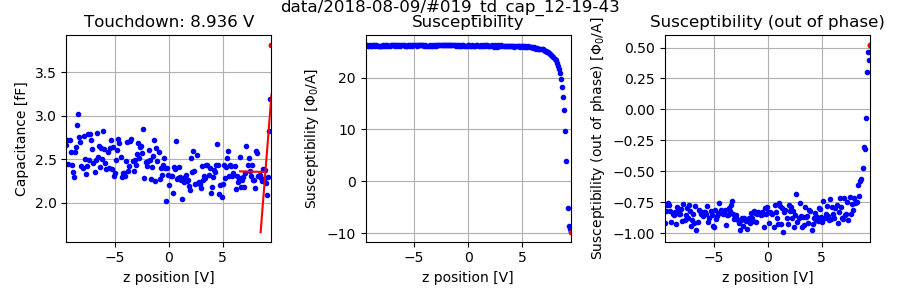

INFO:2018-08-09_12:19:43:microscope:Starting capacitive touchdown.


Started at 2018-08-09 12:19:43


INFO:2018-08-09_12:21:38:scanner:Touchdown occurred at 8.936 V.
INFO:2018-08-09_12:21:38:scanner:Pre-touchdown slope: -0.003173907314088196 fF/V.
INFO:2018-08-09_12:21:38:scanner:Post-touchdown slope: 1.5768970245797789 fF/V.
INFO:2018-08-09_12:21:48:scanner:Moved scanner from [-0.60299999999999998, -0.629, 9.3989999999999991] V to [-0.60299999999999998, -0.629, -9.9000000000000004] V.
INFO:2018-08-09_12:21:48:microscope:Touchdown confirmed.


DataSet:
   location = 'data/2018-08-09/#019_td_cap_12-19-43'
   <Type>   | <array_id>             | <array.name> | <array.shape>
   Setpoint | benders_position_z_set | position_z   | (191,)
   Measured | daq_ai_voltage         | voltage      | (191, 3, 1)
Finished at 2018-08-09 12:21:48


In [14]:
m.approach(measurements['td_cap'], attosteps=100)

<IPython.core.display.Javascript object>


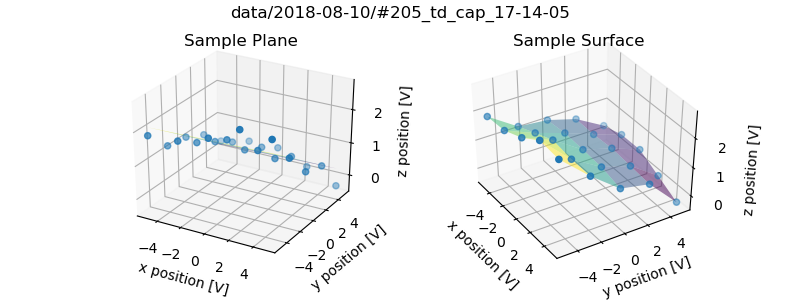

INFO:2018-08-10_17:15:25:scanner:Moved scanner from [4.9109999999999996, 4.8949999999999996, -10] V to [-0.062, -0.115, -9.9629999999999992] V.
INFO:2018-08-10_17:15:25:microscope:New plane : [0.0098852715965510127, -0.19671008192684356, 1.1852712075081246].


In [15]:
x = y = np.linspace(-5,5,5)
m.get_surface(x, y, measurements['td_cap'])